In [1]:
#Load Required Libraries
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
insurance_data = pd.read_csv("insurance.csv")

## T1: Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Observations : 

1. There is about 1338 entries in the datasets(rows) and 7 features (columns)
2. sex, smoker and region attributes has categorical values as its datatype is object
3. None of the attributes have the null value

## T2: Display the statistical values for each of the attributes, along with visualizations (e.g.,histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

In [7]:
insurance_data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


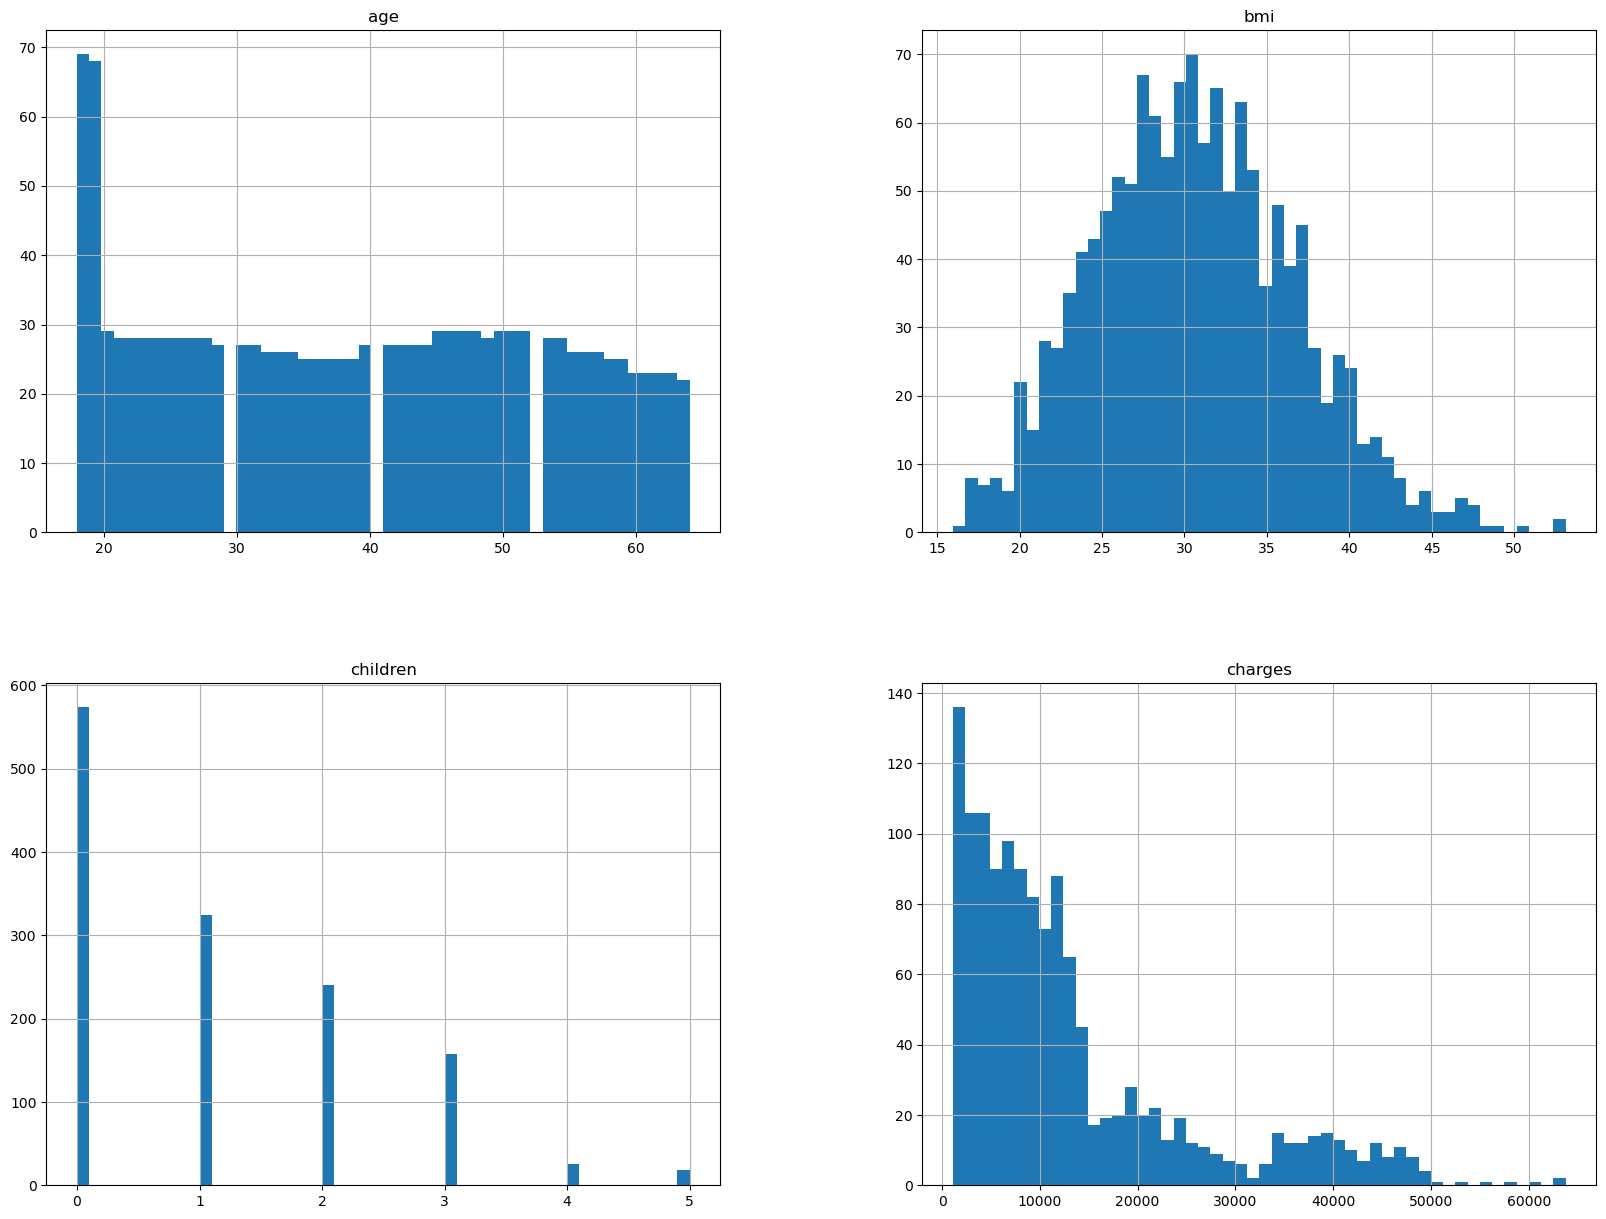

In [8]:
insurance_data.hist(bins = 50, figsize=(20,15))
plt.show()

#### Observations:
    Key Atrributes:
        1. We have nearly uniform number of records in all age groups.
        2. The BMI shows characteristics if normal distribution
        3. Most of records indicate that people have less than 1 children
        4. Most peoples Insurance charges ranges between 0 to 15000
    The Atrributes that require special treatment are sex, smoker and region attributes as they contain catogorical values.

## T3: Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots

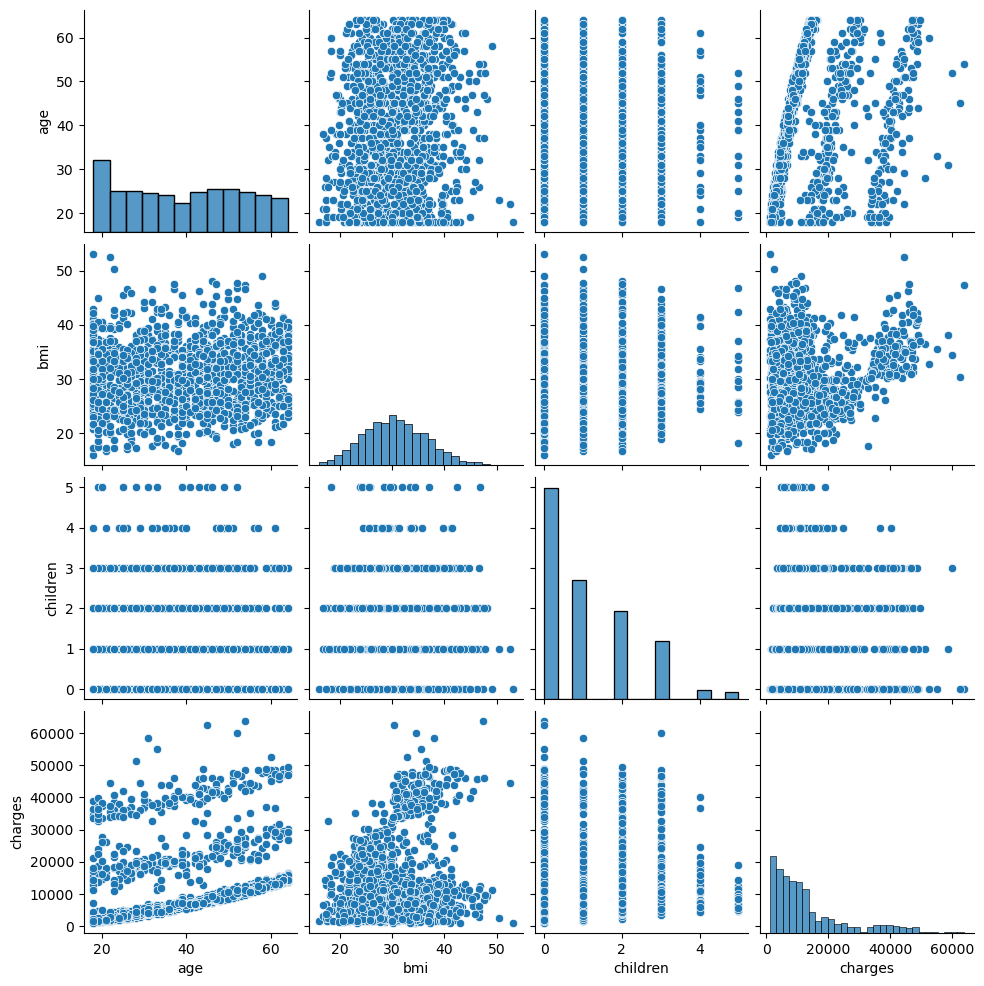

In [9]:
# Analyzing Relationships by Pairplot
sns.pairplot(insurance_data)

<AxesSubplot: xlabel='charges', ylabel='age'>

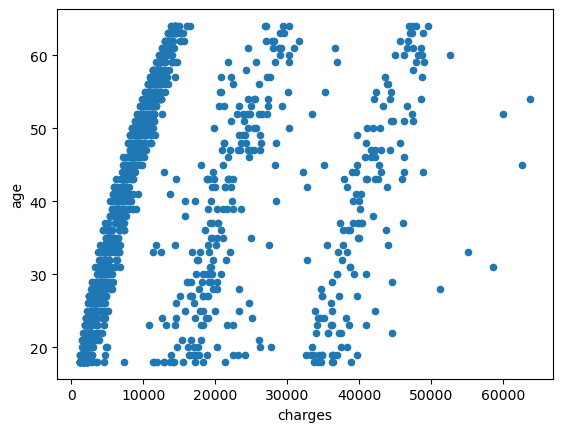

In [10]:
# Analysing Relationship between data attributes and label
insurance_data.plot.scatter(x='charges', y= 'age')

<AxesSubplot: xlabel='charges', ylabel='bmi'>

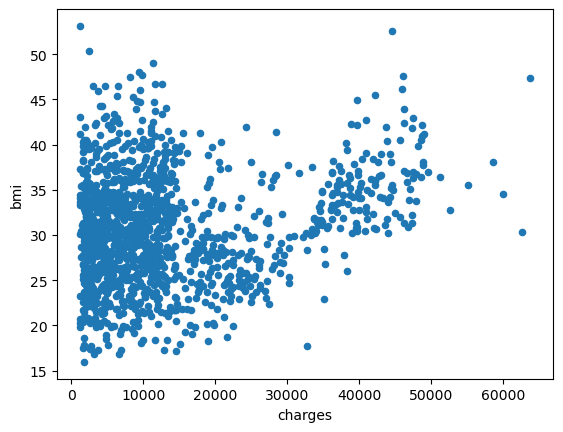

In [11]:
# Analysing Relationship between data attributes and label
insurance_data.plot.scatter(x='charges', y= 'bmi')

<AxesSubplot: xlabel='charges', ylabel='children'>

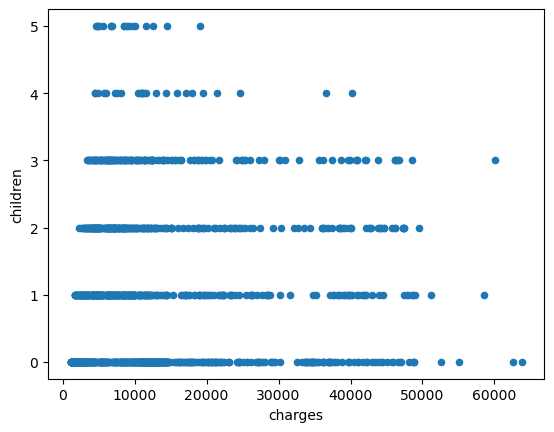

In [12]:
# Analysing Relationship between data attributes and label
insurance_data.plot.scatter(x='charges', y= 'children')

In [13]:
#Computing PCC
insurance_data.corr(method ='pearson')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Now Data as Cleaning process has to be done
1. As there are no null values there is no need for substitution.
2. We will scale everything into the same scale(except charges)
3. And, finally we will separate label charges from the data.

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [15]:
num_attribs = ['age', 'bmi', 'children','charges']

num_pipeline = make_pipeline(StandardScaler(),SimpleImputer(strategy="median"))

In [16]:
cat_attribs = ["sex","smoker","region"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder())

In [17]:
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [18]:
features_prepared = preprocessing.fit_transform(insurance_data)

In [19]:
features = pd.DataFrame(
    features_prepared, columns=preprocessing.get_feature_names_out(),
    index=insurance_data.index)

In [20]:
labels = pd.DataFrame(insurance_data[['charges']])

In [21]:
features.describe() , labels.describe()

(           num__age      num__bmi  num__children  num__charges     cat__sex  \
 count  1.338000e+03  1.338000e+03   1.338000e+03  1.338000e+03  1338.000000   
 mean  -1.805565e-16 -2.124194e-16  -5.576008e-17 -8.098488e-17     0.505232   
 std    1.000374e+00  1.000374e+00   1.000374e+00  1.000374e+00     0.500160   
 min   -1.509965e+00 -2.412011e+00  -9.086137e-01 -1.003557e+00     0.000000   
 25%   -8.691547e-01 -7.164063e-01  -9.086137e-01 -7.046504e-01     0.000000   
 50%   -1.474046e-02 -4.320880e-02  -7.876719e-02 -3.212089e-01     1.000000   
 75%    8.396738e-01  6.611572e-01   7.510793e-01  2.783441e-01     1.000000   
 max    1.765289e+00  3.685522e+00   3.240619e+00  4.171663e+00     1.000000   
 
        cat__smoker  cat__region  
 count  1338.000000  1338.000000  
 mean      0.204783     1.515695  
 std       0.403694     1.104885  
 min       0.000000     0.000000  
 25%       0.000000     1.000000  
 50%       0.000000     2.000000  
 75%       0.000000     2.000000 

## T4: Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.

To select 20% data for testing, we will use the train_test_split() method from sklearn.model_selection class, with test_size = 0.2. Here, 0.2 indicates 20% of total dataset. 

In [22]:
from sklearn.model_selection import train_test_split
phi_train, phi_test, t_train, t_test = train_test_split(features, labels, test_size=0.2, shuffle=True, random_state=42)

In [23]:
phi_train.describe()

,num__age,num__bmi,num__children,num__charges,cat__sex,cat__smoker,cat__region
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,0.010679,-0.016897,0.010422,0.006251,0.512150,0.205607,1.508411
std,1.002083,0.991384,1.009080,0.992898,0.500086,0.404334,1.115175
min,-1.509965,-2.412011,-0.908614,-1.003557,0.000000,0.000000,0.000000
25%,-0.869155,-0.731375,-0.908614,-0.691650,0.000000,0.000000,1.000000
50%,0.020860,-0.074377,-0.078767,-0.305232,1.000000,0.000000,2.000000
75%,0.839674,0.628758,0.751079,0.287162,1.000000,0.000000,2.000000
max,1.765289,3.685522,3.240619,4.074389,1.000000,1.000000,3.000000


In [24]:
phi_test.describe()

,num__age,num__bmi,num__children,num__charges,cat__sex,cat__smoker,cat__region
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,-0.042636,0.067460,-0.041610,-0.024956,0.477612,0.201493,1.544776
std,0.994241,1.034637,0.965548,1.031202,0.500433,0.401866,1.064340
min,-1.509965,-2.271753,-0.908614,-1.002762,0.000000,0.000000,0.000000
25%,-0.940356,-0.654890,-0.908614,-0.741951,0.000000,0.000000,1.000000
50%,-0.085942,0.019128,-0.078767,-0.395072,0.000000,0.000000,2.000000
75%,0.768473,0.744205,0.751079,0.255868,1.000000,0.000000,2.000000
max,1.765289,3.595298,3.240619,4.171663,1.000000,1.000000,3.000000


#### Observation:
1. The data given by phi_train and phi_test, the mean, standard deviation and the quartile ranges are almost similar. This means the both train and test datasets are derived from the same distribution. Thus, are representative of the entire dataset.

## Task 5: Linear Regression

## Task 5a: Train  a  Linear  Regression  model  using  the  training  data  with  four-fold  cross-validation using appropriate evaluation metric. Display the training and validation loss as a function of training iterations. 

In [25]:
from sklearn.model_selection import KFold, learning_curve, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [26]:
reg = LinearRegression().fit(phi_train, t_train)

reg_cv = cross_validate(reg, 
                        phi_train, 
                        t_train, 
                        scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                        cv=4, 
                        return_train_score=True)

In [27]:
# let's look at the output from k fold
print("Linear Regression: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format(np.mean(reg_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format(np.mean(reg_cv['test_r2'])))


print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(reg_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(reg_cv['test_neg_root_mean_squared_error'])))


print("\n For metric Mean Absolute Error(MAE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(reg_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(reg_cv['test_neg_mean_absolute_error'])))

Linear Regression: 

 For metric R^2 :
	 Training loss: 1.000
	 Validation loss: 1.000

 For metric Root mean Squared Error(RMSE) :
	 Training loss: 0.000
	 Validation loss: 0.000

 For metric Mean Absolute Error(MAE) :
	 Training loss: 0.000
	 Validation loss: 0.000


#### Training and validation loss as a function of training set size

In [28]:
train_sizes, train_scores, valid_scores = learning_curve(reg, 
                                                         phi_train, 
                                                         t_train, 
                                                         train_sizes=np.linspace(0.1, 1.0,10), 
                                                         cv=4, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

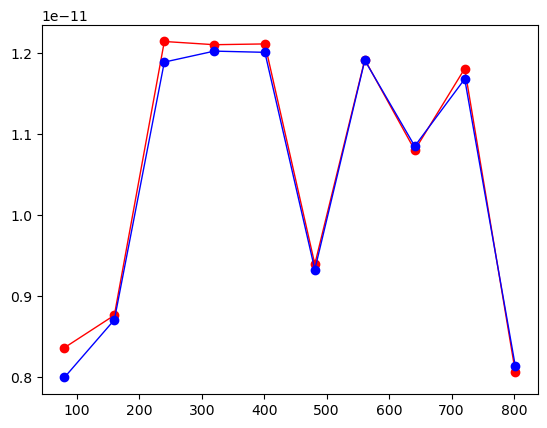

In [29]:
plt.plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
plt.plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

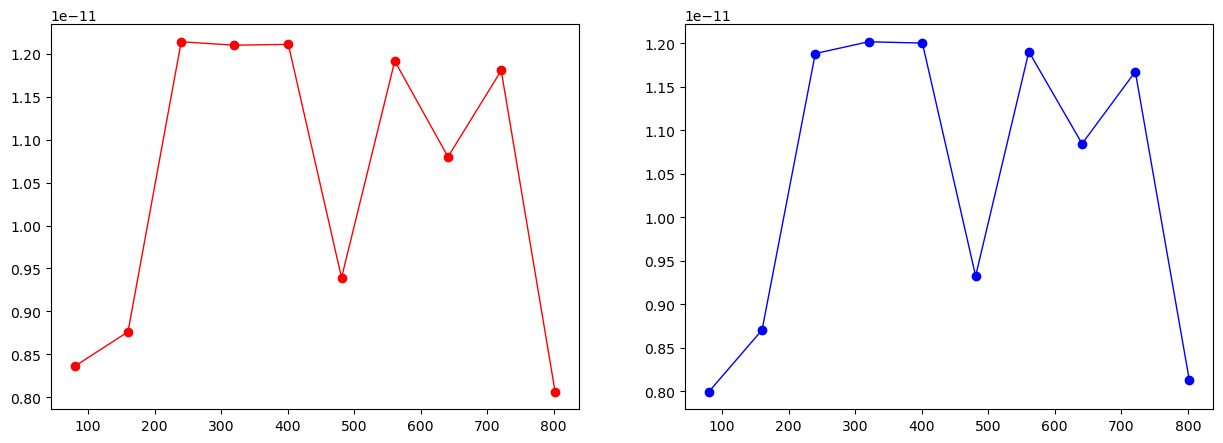

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

## Task 5b: Train  a  Stochastic Gradient Descent(SGD) Regression  model  using  the  training  data  with  four-fold  cross-validation using appropriate evaluation metric. Display the training and validation loss as a function of training iterations. 

In [31]:
from sklearn.linear_model import SGDRegressor

In [32]:
sgd_reg = SGDRegressor(max_iter=1000, 
                       tol=1e-5, 
                       eta0=0.01, 
                       n_iter_no_change=100, 
                       random_state=42)

sgd_reg.fit(phi_train, t_train)

sgd_reg_cv = cross_validate(sgd_reg, 
                        phi_train, 
                        t_train, 
                        scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                        cv=4, 
                        return_train_score=True)

In [33]:
# let's look at the output from k fold
print("Stochastic Gradient Descent Regression: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format(np.mean(sgd_reg_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format(np.mean(sgd_reg_cv['test_r2'])))


print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(sgd_reg_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(sgd_reg_cv['test_neg_root_mean_squared_error'])))


print("\n For metric Mean Absolute Error(MAE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(sgd_reg_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(sgd_reg_cv['test_neg_mean_absolute_error'])))

Stochastic Gradient Descent Regression: 

 For metric R^2 :
	 Training loss: 1.000
	 Validation loss: 1.000

 For metric Root mean Squared Error(RMSE) :
	 Training loss: 2.396
	 Validation loss: 2.418

 For metric Mean Absolute Error(MAE) :
	 Training loss: 1.653
	 Validation loss: 1.669


#### Training and validation loss as a function of training set size

In [34]:
train_sizes, train_scores, valid_scores = learning_curve( sgd_reg, 
                                                         phi_train, 
                                                         t_train, 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), 
                                                         cv=4, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

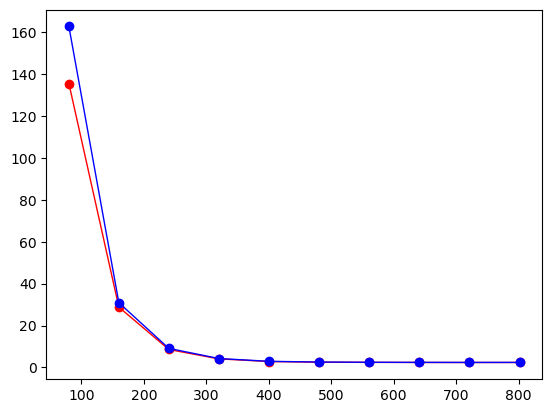

In [35]:
plt.plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
plt.plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

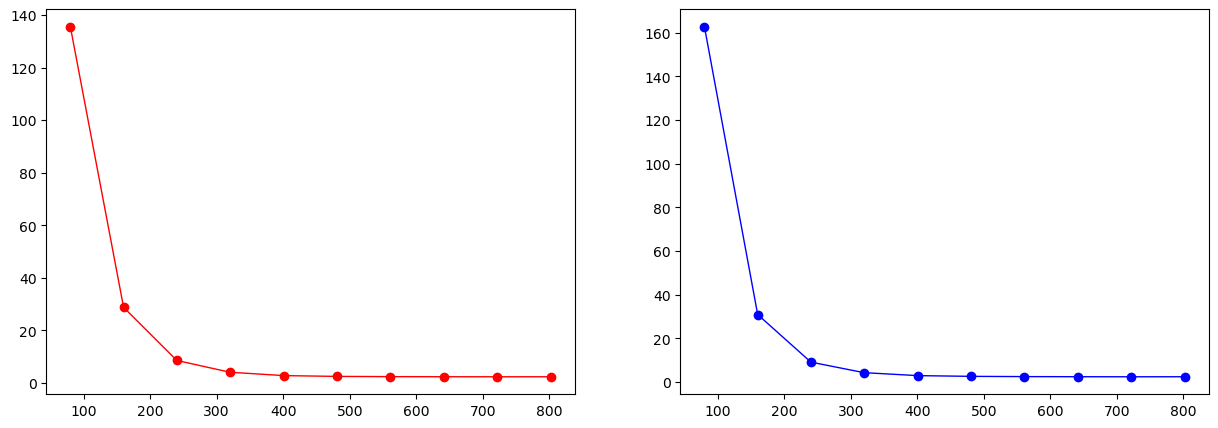

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

## Task 5 c: Train  a  Ridge Regression  model  using  the  training  data  with  four-fold  cross-validation using appropriate evaluation metric. Display the training and validation loss as a function of training iterations. 

In [37]:
from sklearn.linear_model import Ridge

In [38]:
ridge_reg = Ridge(alpha=0.1, solver="cholesky")

ridge_reg.fit(phi_train, t_train)

ridge_reg_cv = cross_validate(ridge_reg, 
                        phi_train, 
                        t_train, 
                        scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                        cv=4, 
                        return_train_score=True)

In [39]:
# let's look at the output from k fold
print("Ridge Regression: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format(np.mean(ridge_reg_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format(np.mean(ridge_reg_cv['test_r2'])))


print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(ridge_reg_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(ridge_reg_cv['test_neg_root_mean_squared_error'])))


print("\n For metric Mean Absolute Error(MAE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(ridge_reg_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(ridge_reg_cv['test_neg_mean_absolute_error'])))

Ridge Regression: 

 For metric R^2 :
	 Training loss: 1.000
	 Validation loss: 1.000

 For metric Root mean Squared Error(RMSE) :
	 Training loss: 2.988
	 Validation loss: 3.016

 For metric Mean Absolute Error(MAE) :
	 Training loss: 2.059
	 Validation loss: 2.079


#### Training and validation loss as a function of training set size

In [40]:
train_sizes, train_scores, valid_scores = learning_curve(ridge_reg, 
                                                         phi_train, 
                                                         t_train, 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), 
                                                         cv=4, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

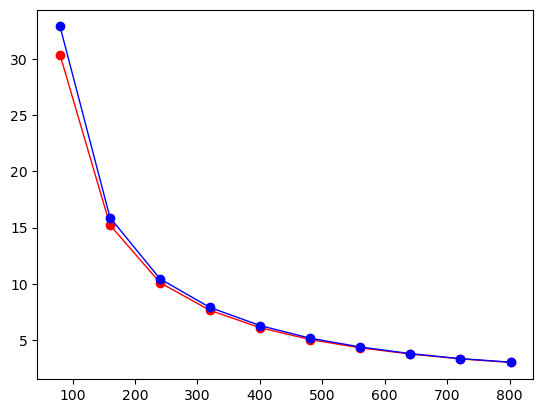

In [41]:
plt.plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
plt.plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

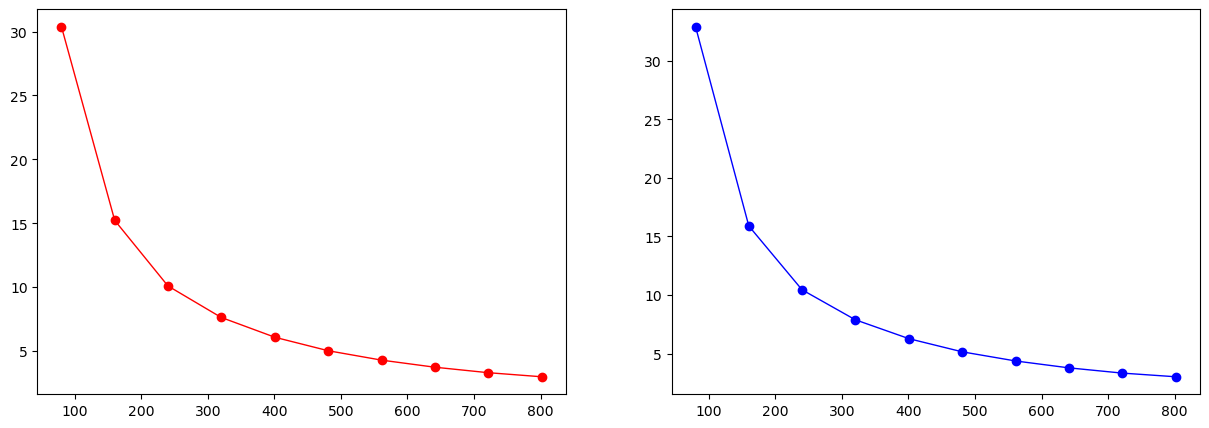

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

### Hyperparameter Tuning for Ridge Regression

In [43]:
from sklearn.linear_model import RidgeCV

In [44]:
ridge_cv = RidgeCV(alphas=np.arange(0.01,2,0.01)).fit(phi_train, t_train)
ridge_cv.score(phi_train, t_train)

0.9999999996515413

In [45]:
ridge_cv.alpha_

0.01

In [46]:
ridge_reg_training_loss = []
ridge_reg_validation_loss = []
for aplha_value in np.arange(0.01,2,0.01):
    ridge_reg = Ridge(alpha=aplha_value, solver="cholesky")
    ridge_reg_cv = cross_validate(ridge_reg, 
                                  phi_train, 
                                  t_train, 
                                  scoring='neg_root_mean_squared_error', 
                                  cv=4, 
                                  return_train_score=True)
    
    ridge_reg_training_loss.append(-np.mean(ridge_reg_cv['train_score']))
    ridge_reg_validation_loss.append(-np.mean(ridge_reg_cv['test_score']))

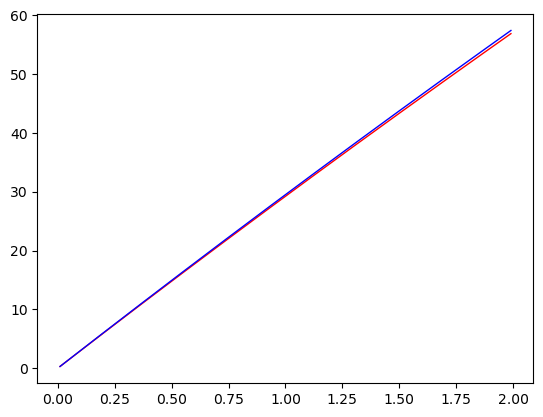

In [47]:
plt.plot(np.arange(0.01,2,0.01), ridge_reg_training_loss, "r-", linewidth=1, label="train")
plt.plot(np.arange(0.01,2,0.01), ridge_reg_validation_loss, "b-", linewidth=1, label="valid")

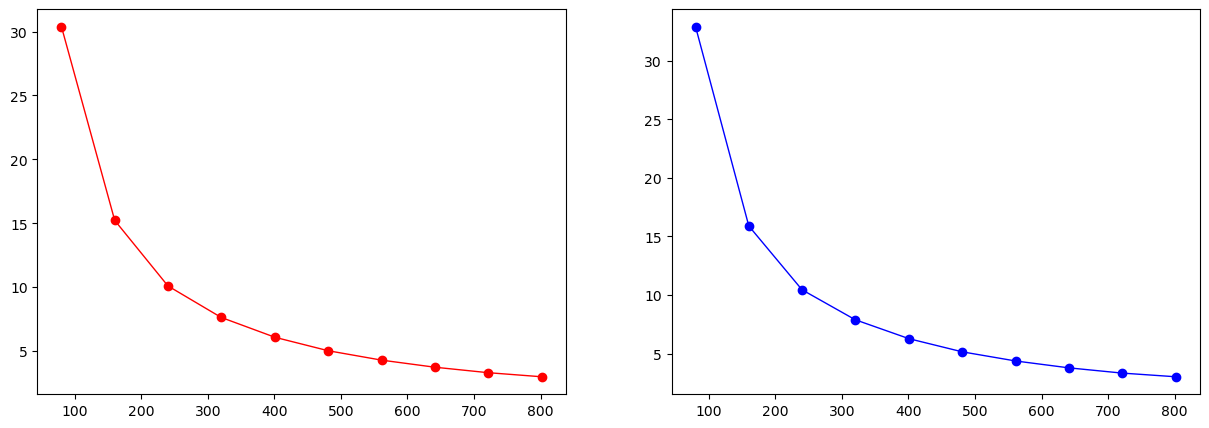

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

## Task 5 d: Train  a  Lasso Regression  model  using  the  training  data  with  four-fold  cross-validation using appropriate evaluation metric. Display the training and validation loss as a function of training iterations. 

In [49]:
from sklearn.linear_model import Lasso

In [50]:
lasso_reg = Lasso(alpha=0.1)

lasso_reg.fit(phi_train, t_train)

t_pred = lasso_reg.predict(phi_test)

lasso_reg_cv = cross_validate(lasso_reg, 
                        phi_train, 
                        t_train, 
                        scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                        cv=4, 
                        return_train_score=True)

In [51]:
# let's look at the output from k fold
print("Lasso Regression: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format(np.mean(lasso_reg_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format(np.mean(lasso_reg_cv['test_r2'])))


print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(lasso_reg_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(lasso_reg_cv['test_neg_root_mean_squared_error'])))


print("\n For metric Mean Absolute Error(MAE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(lasso_reg_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(lasso_reg_cv['test_neg_mean_absolute_error'])))

Lasso Regression: 

 For metric R^2 :
	 Training loss: 1.000
	 Validation loss: 1.000

 For metric Root mean Squared Error(RMSE) :
	 Training loss: 0.601
	 Validation loss: 0.607

 For metric Mean Absolute Error(MAE) :
	 Training loss: 0.440
	 Validation loss: 0.444


#### Training and validation loss as a function of training set size

In [52]:
train_sizes, train_scores, valid_scores = learning_curve(lasso_reg, 
                                                         phi_train, 
                                                         t_train, 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), 
                                                         cv=4, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

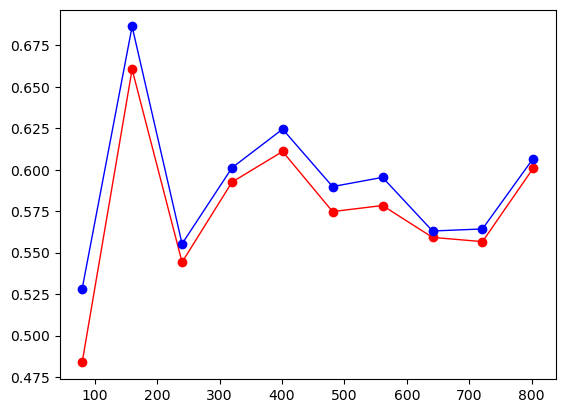

In [53]:
plt.plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
plt.plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

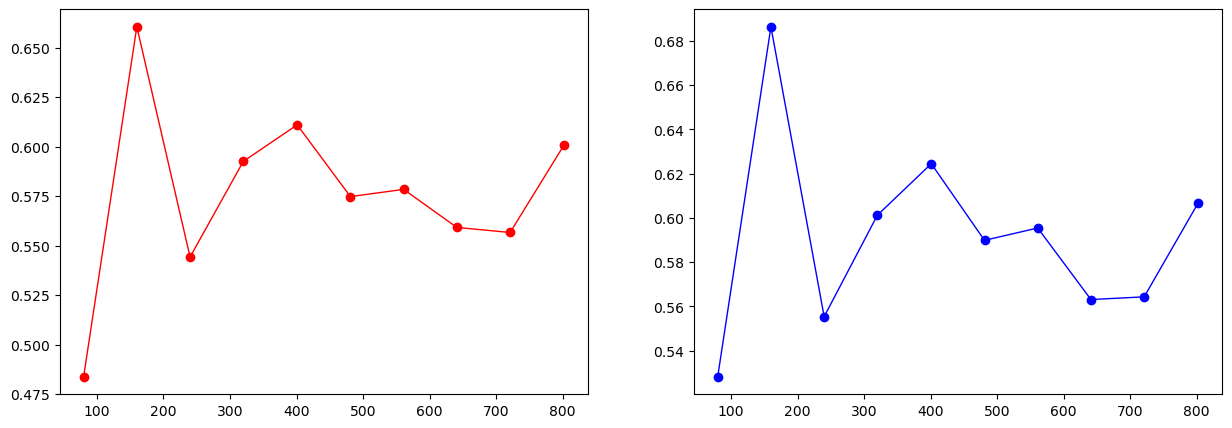

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

### Hyperparameter Tuning for Lasso Regression

In [55]:
from sklearn.linear_model import LassoCV

In [56]:
lasso_cv = LassoCV(alphas=np.arange(0.01,2,0.01)).fit(phi_train, t_train)
lasso_cv.score(phi_train, t_train)

0.9999999954967531

In [57]:
# The amount of penalization chosen by cross validation.
lasso_cv.alpha_

0.01

In [58]:
lasso_reg_training_loss = []
lasso_reg_validation_loss = []
for aplha_value in np.arange(0.01,2,0.01):
    lasso_reg = Lasso(alpha=aplha_value)
    lasso_reg_cv = cross_validate(lasso_reg, 
                                  phi_train, 
                                  t_train, 
                                  scoring='neg_root_mean_squared_error', 
                                  cv=4, 
                                  return_train_score=True)
    
    lasso_reg_training_loss.append(-np.mean(lasso_reg_cv['train_score']))
    lasso_reg_validation_loss.append(-np.mean(lasso_reg_cv['test_score']))

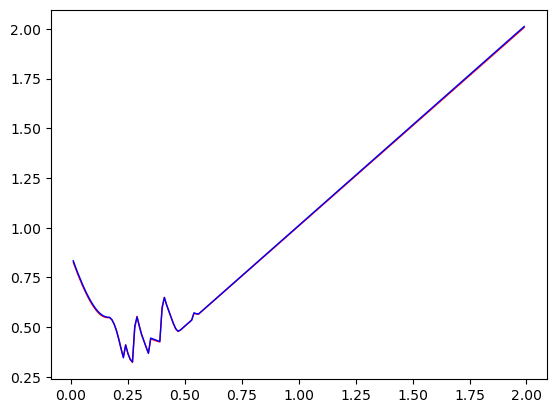

In [59]:
plt.plot(np.arange(0.01,2,0.01), lasso_reg_training_loss, "r-", linewidth=1, label="train")
plt.plot(np.arange(0.01,2,0.01), lasso_reg_validation_loss, "b-", linewidth=1, label="valid")

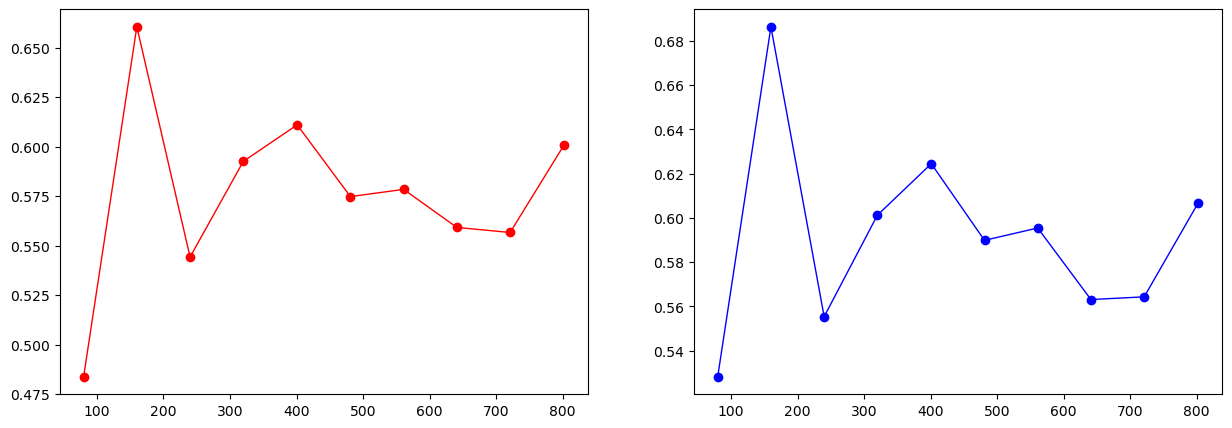

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

In [61]:

print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(lasso_reg_cv['train_score'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(lasso_reg_cv['test_score'])))



 For metric Root mean Squared Error(RMSE) :
	 Training loss: 2.007
	 Validation loss: 2.012


## Task 5 e: Train  a  Elastic Net Regression  model  using  the  training  data  with  four-fold  cross-validation using appropriate evaluation metric. Display the training and validation loss as a function of training iterations. 

In [62]:
from sklearn.linear_model import ElasticNet

In [63]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

elastic_net.fit(phi_train, t_train)

t_pred = elastic_net.predict(phi_test)

elastic_net_cv = cross_validate(elastic_net, 
                        phi_train, 
                        t_train, 
                        scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                        cv=4, 
                        return_train_score=True)

In [64]:
# let's look at the output from k fold
print("Elastic Net Regression: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format(np.mean(elastic_net_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format(np.mean(elastic_net_cv['test_r2'])))


print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(elastic_net_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(elastic_net_cv['test_neg_root_mean_squared_error'])))


print("\n For metric Mean Absolute Error(MAE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(elastic_net_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(elastic_net_cv['test_neg_mean_absolute_error'])))

Elastic Net Regression: 

 For metric R^2 :
	 Training loss: 0.996
	 Validation loss: 0.996

 For metric Root mean Squared Error(RMSE) :
	 Training loss: 714.499
	 Validation loss: 720.467

 For metric Mean Absolute Error(MAE) :
	 Training loss: 519.085
	 Validation loss: 523.041


#### Training and validation loss as a function of training set size

In [65]:
train_sizes, train_scores, valid_scores = learning_curve(elastic_net, 
                                                         phi_train, 
                                                         t_train, 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), 
                                                         cv=4, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

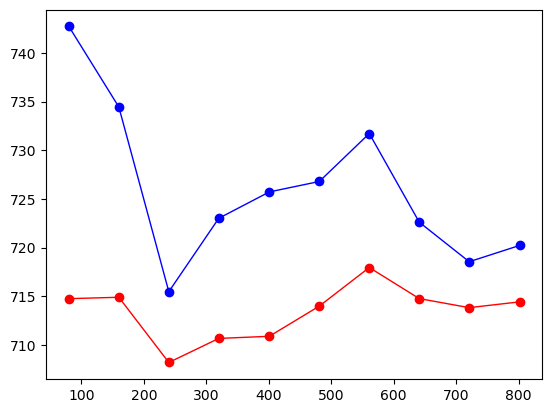

In [66]:
plt.plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
plt.plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

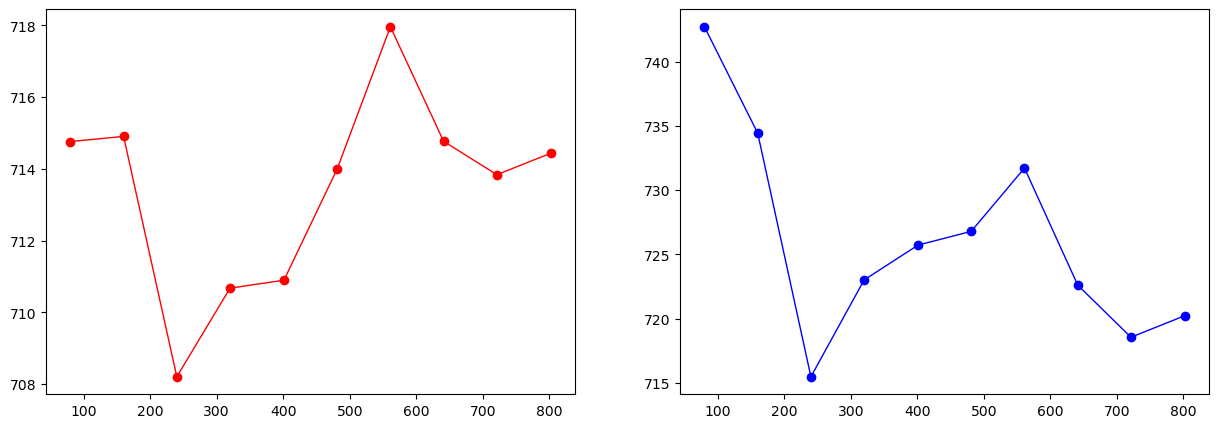

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

# ElasticNet with different penalty terms : 

The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. 

For l1_ratio = 0 the penalty is an L2 penalty. 

For l1_ratio = 1 it is an L1 penalty. 

For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

### Hyperparameter Tuning for ElasticNet Regression

In [68]:
from sklearn.linear_model import ElasticNetCV

In [69]:
elastic_net_cv = ElasticNetCV(alphas=np.arange(0.01,2,0.01), l1_ratio=np.arange(0.0,1.1,0.1)).fit(phi_train, t_train)
elastic_net_cv.score(phi_train, t_train)

0.9999999954967531

In [70]:
elastic_net_cv.alpha_ , elastic_net_cv.l1_ratio_

(0.01, 1.0)

Training and validation loss as a function of training iterations. 

In [71]:
elastic_net_training_loss = []
elastic_net_validation_loss = []
for l1_ratio_value in np.arange(0.0,1.1,0.1):
    elastic_net = ElasticNet(alpha=0.01, l1_ratio=l1_ratio_value)
    elastic_net_cv = cross_validate(elastic_net, 
                                  phi_train, 
                                  t_train, 
                                  scoring='neg_root_mean_squared_error', 
                                  cv=4, 
                                  return_train_score=True)

    elastic_net_training_loss.append(-np.mean(elastic_net_cv['train_score']))
    elastic_net_validation_loss.append(-np.mean(elastic_net_cv['test_score']))

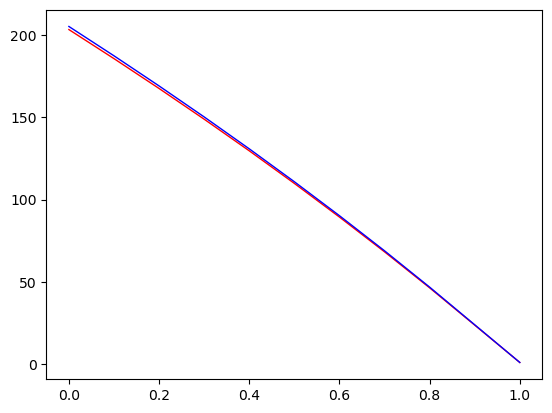

In [72]:
plt.plot(np.arange(0.0,1.1,0.1), elastic_net_training_loss, "r-", linewidth=1, label="train")
plt.plot(np.arange(0.0,1.1,0.1), elastic_net_validation_loss, "b-", linewidth=1, label="valid")

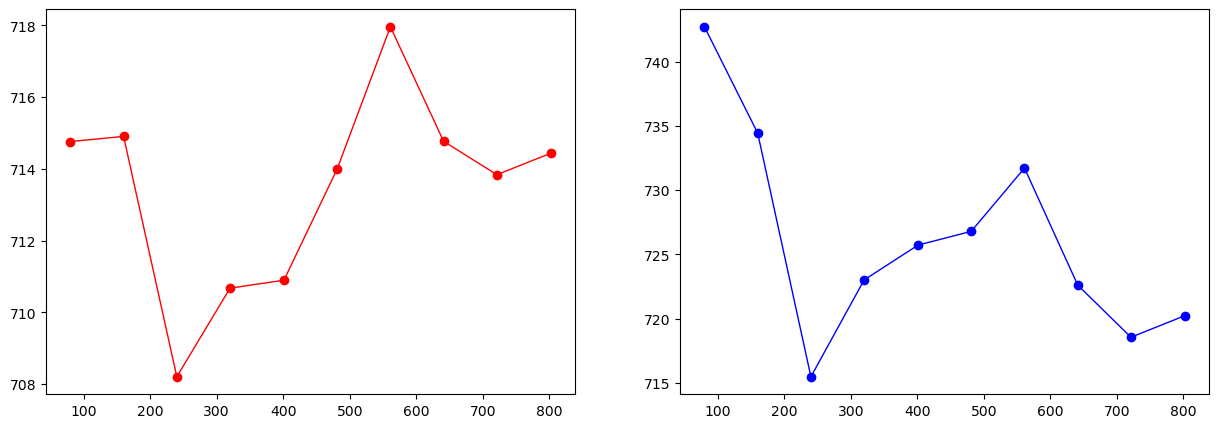

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

### Task 5: Observations: 
As we can observe, there is very little diffrence between training loss and testing loss of all the linear regression models, when a cross validation method used with 3 parameters  𝑅2, Root-Mean Squared Error, and Mean Absolute error. This suggests that the Linear regression model is overfitting but with a very little margin.

## Task 6 : Polynomial Regression

## Task 6a: Train  a  Linear  Regression  model  using  the  training  data  with  four-fold  cross-validation using appropriate evaluation metric. Display the training and validation loss as a function of training iterations. 

In [74]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [75]:
poly_phi_train = poly_features.fit_transform(phi_train)
poly_phi_test = poly_features.fit_transform(phi_test)

In [76]:
reg = LinearRegression().fit(poly_phi_train, t_train)

reg_cv = cross_validate(reg, 
                        poly_phi_train, 
                        t_train, 
                        scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                        cv=4, 
                        return_train_score=True)

In [77]:
# let's look at the output from k fold
print("Linear Regression: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format(np.mean(reg_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format(np.mean(reg_cv['test_r2'])))


print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(reg_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(reg_cv['test_neg_root_mean_squared_error'])))


print("\n For metric Mean Absolute Error(MAE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(reg_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(reg_cv['test_neg_mean_absolute_error'])))

Linear Regression: 

 For metric R^2 :
	 Training loss: 1.000
	 Validation loss: 1.000

 For metric Root mean Squared Error(RMSE) :
	 Training loss: 0.000
	 Validation loss: 0.000

 For metric Mean Absolute Error(MAE) :
	 Training loss: 0.000
	 Validation loss: 0.000


#### Training and validation loss as a function of training set size

In [78]:
train_sizes, train_scores, valid_scores = learning_curve(reg, 
                                                         poly_phi_train, 
                                                         t_train, 
                                                         train_sizes=np.linspace(0.1, 1.0,10), 
                                                         cv=4, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

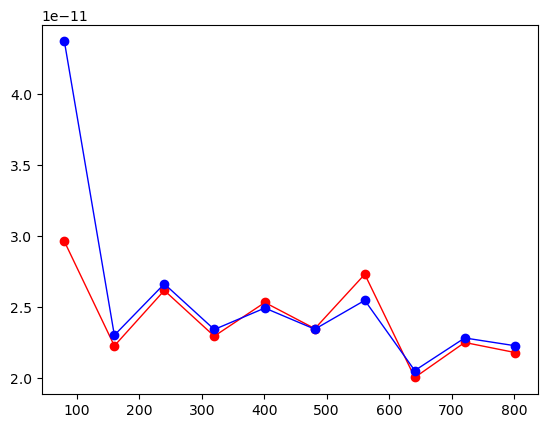

In [79]:
plt.plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
plt.plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

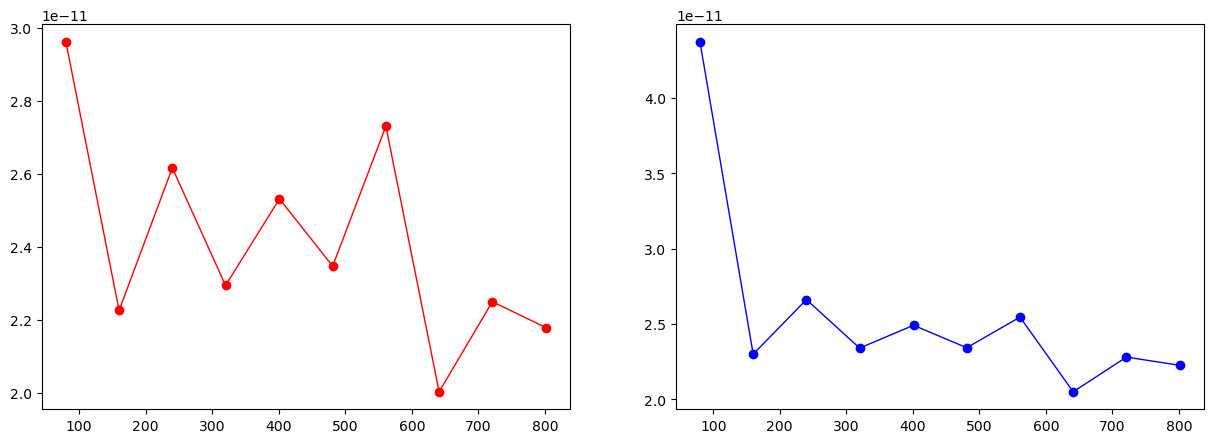

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

## Task 6b: Train  a  Stochastic Gradient Descent Regression  model  using  the  training  data  with  four-fold  cross-validation using appropriate evaluation metric. Display the training and validation loss as a function of training iterations. 

In [81]:
sgd_reg = SGDRegressor(max_iter=1000, 
                       tol=1e-5, 
                       eta0=0.01, 
                       alpha = 0.01,
                       n_iter_no_change=100, 
                       random_state=42)

sgd_reg.fit(poly_phi_train, t_train)

sgd_reg_cv = cross_validate(sgd_reg, 
                        poly_phi_train, 
                        t_train, 
                        scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                        cv=4, 
                        return_train_score=True)

In [82]:
# let's look at the output from k fold
print("Stochastic Gradient Descent Regression: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format(np.mean(sgd_reg_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format(np.mean(sgd_reg_cv['test_r2'])))


print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(sgd_reg_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(sgd_reg_cv['test_neg_root_mean_squared_error'])))


print("\n For metric Mean Absolute Error(MAE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(sgd_reg_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(sgd_reg_cv['test_neg_mean_absolute_error'])))

Stochastic Gradient Descent Regression: 

 For metric R^2 :
	 Training loss: 0.999
	 Validation loss: 0.999

 For metric Root mean Squared Error(RMSE) :
	 Training loss: 387.034
	 Validation loss: 415.504

 For metric Mean Absolute Error(MAE) :
	 Training loss: 236.785
	 Validation loss: 249.189


#### Training and validation loss as a function of training set size

In [83]:
train_sizes, train_scores, valid_scores = learning_curve(sgd_reg, 
                                                         poly_phi_train, 
                                                         t_train, 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), 
                                                         cv=4, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

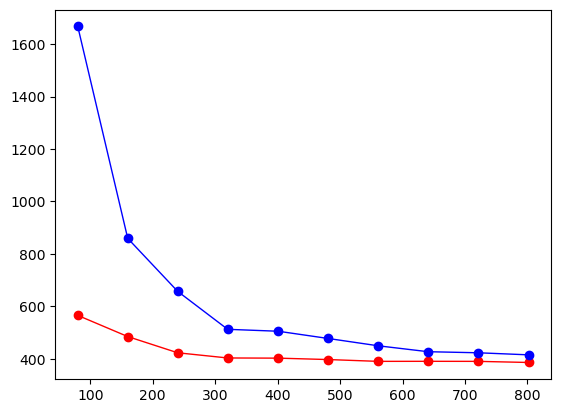

In [84]:
plt.plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
plt.plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

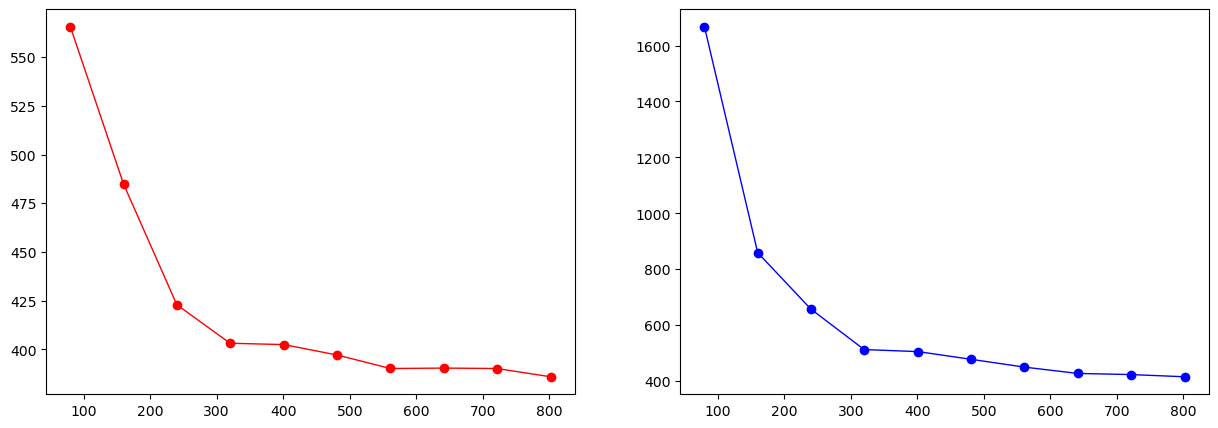

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

## Task 6 c: Train  a  Ridge Regression  model  using  the  training  data  with  four-fold  cross-validation using appropriate evaluation metric. Display the training and validation loss as a function of training iterations. 

In [86]:
ridge_reg = Ridge(alpha=0.1, solver="cholesky")

ridge_reg.fit(poly_phi_train, t_train)

ridge_reg_cv = cross_validate(ridge_reg, 
                        poly_phi_train, 
                        t_train, 
                        scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                        cv=4, 
                        return_train_score=True)

In [87]:
# let's look at the output from k fold
print("Ridge Regression: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format(np.mean(ridge_reg_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format(np.mean(ridge_reg_cv['test_r2'])))


print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(ridge_reg_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(ridge_reg_cv['test_neg_root_mean_squared_error'])))


print("\n For metric Mean Absolute Error(MAE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(ridge_reg_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(ridge_reg_cv['test_neg_mean_absolute_error'])))

Ridge Regression: 

 For metric R^2 :
	 Training loss: 1.000
	 Validation loss: 1.000

 For metric Root mean Squared Error(RMSE) :
	 Training loss: 7.190
	 Validation loss: 8.013

 For metric Mean Absolute Error(MAE) :
	 Training loss: 4.273
	 Validation loss: 4.594


#### Training and validation loss as a function of training set size

In [88]:
train_sizes, train_scores, valid_scores = learning_curve(ridge_reg, 
                                                         poly_phi_train, 
                                                         t_train, 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), 
                                                         cv=4, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

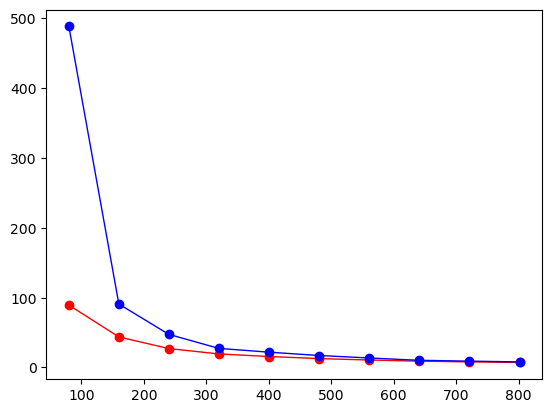

In [89]:
plt.plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
plt.plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

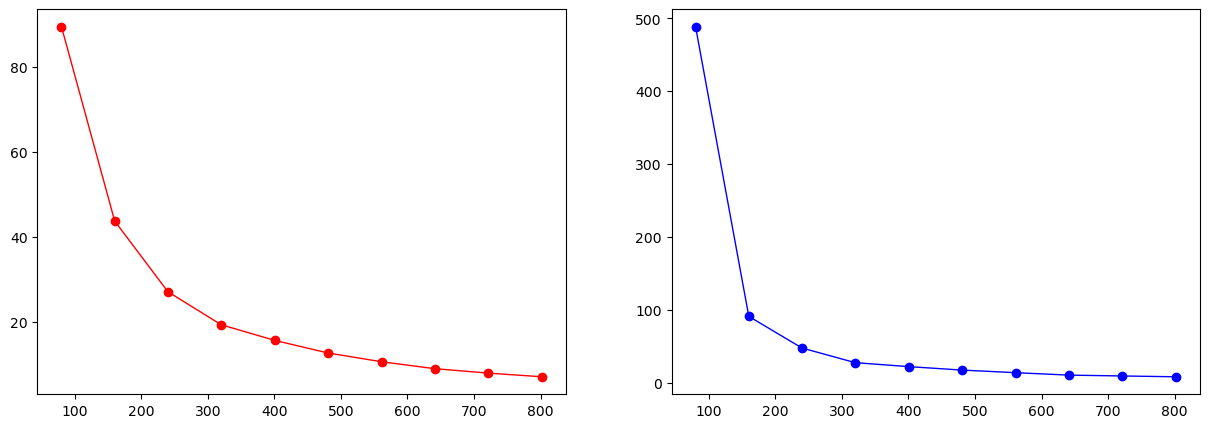

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

### Hyperparameter Tuning for Ridge Regression

In [91]:
ridge_cv = RidgeCV(alphas=np.arange(0.01,2,0.01)).fit(poly_phi_train, t_train)
ridge_cv.score(poly_phi_train, t_train)

0.9999999979883903

In [92]:
ridge_cv.alpha_

0.01

In [93]:
poly_ridge_reg_training_loss = []
poly_ridge_reg_validation_loss = []
for aplha_value in np.arange(0.01,2,0.01):
    poly_ridge_reg = Ridge(alpha=aplha_value, solver="cholesky")
    poly_ridge_reg_cv = cross_validate(poly_ridge_reg, 
                                  poly_phi_train, 
                                  t_train, 
                                  scoring='neg_root_mean_squared_error', 
                                  cv=4, 
                                  return_train_score=True)
    
    poly_ridge_reg_training_loss.append(-np.mean(poly_ridge_reg_cv['train_score']))
    poly_ridge_reg_validation_loss.append(-np.mean(poly_ridge_reg_cv['test_score']))

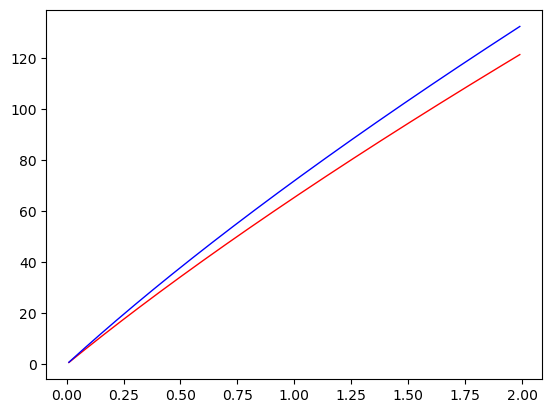

In [94]:
plt.plot(np.arange(0.01,2,0.01), poly_ridge_reg_training_loss, "r-", linewidth=1, label="train")
plt.plot(np.arange(0.01,2,0.01), poly_ridge_reg_validation_loss, "b-", linewidth=1, label="valid")

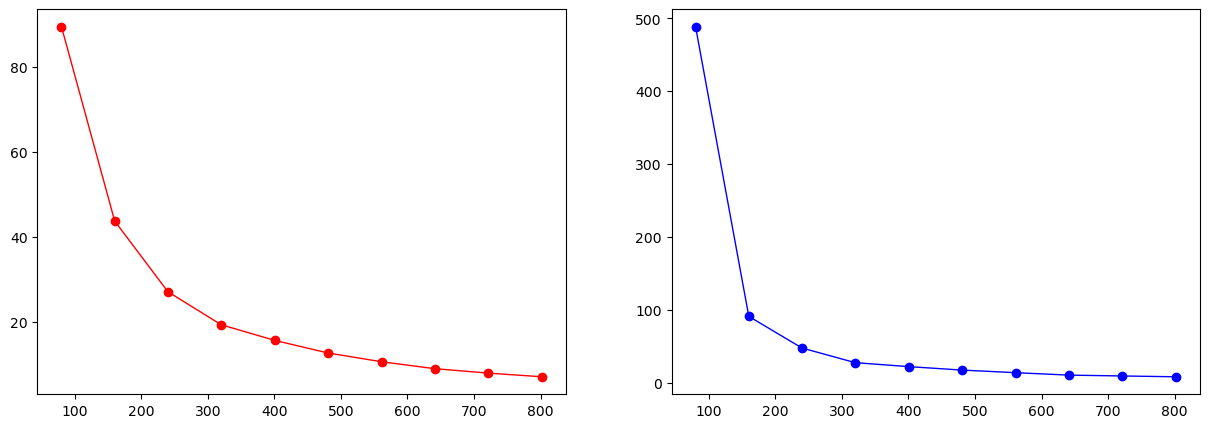

In [95]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

## Task 6 d: Train  a  Lasso Regression  model  using  the  training  data  with  four-fold  cross-validation using appropriate evaluation metric. Display the training and validation loss as a function of training iterations. 

In [96]:
lasso_reg = Lasso(alpha=0.1)

lasso_reg.fit(poly_phi_train, t_train)

t_pred = lasso_reg.predict(poly_phi_test)

lasso_reg_cv = cross_validate(lasso_reg, 
                        poly_phi_train, 
                        t_train, 
                        scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                        cv=4, 
                        return_train_score=True)

In [97]:
# let's look at the output from k fold
print("Lasso Regression: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format(np.mean(lasso_reg_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format(np.mean(lasso_reg_cv['test_r2'])))


print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(lasso_reg_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(lasso_reg_cv['test_neg_root_mean_squared_error'])))


print("\n For metric Mean Absolute Error(MAE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(lasso_reg_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(lasso_reg_cv['test_neg_mean_absolute_error'])))

Lasso Regression: 

 For metric R^2 :
	 Training loss: 1.000
	 Validation loss: 1.000

 For metric Root mean Squared Error(RMSE) :
	 Training loss: 4.212
	 Validation loss: 4.676

 For metric Mean Absolute Error(MAE) :
	 Training loss: 2.597
	 Validation loss: 2.744


#### Training and validation loss as a function of training set size

In [98]:
train_sizes, train_scores, valid_scores = learning_curve(lasso_reg, 
                                                         poly_phi_train, 
                                                         t_train, 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), 
                                                         cv=4, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

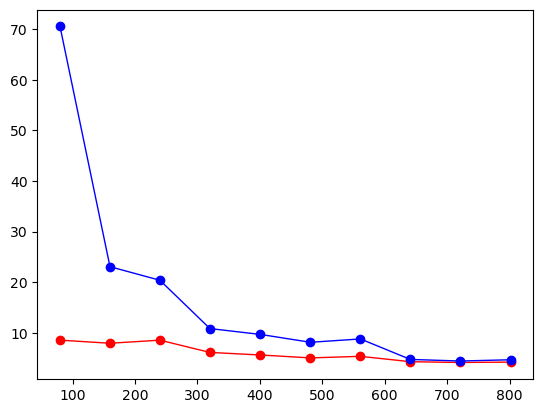

In [99]:
plt.plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
plt.plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

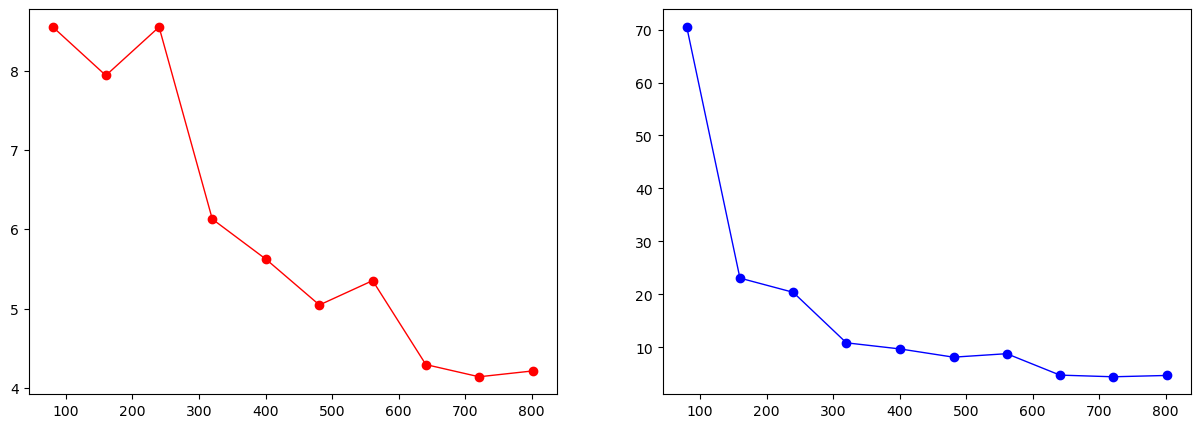

In [100]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

### Hyperparameter Tuning for Lasso Regression

In [101]:
lasso_cv = LassoCV(alphas=np.arange(0.01,2,0.01)).fit(poly_phi_train, t_train)
lasso_cv.score(poly_phi_train, t_train)

0.9999999347773918

In [102]:
# The amount of penalization chosen by cross validation.
lasso_cv.alpha_

0.01

In [103]:
poly_lasso_reg_training_loss = []
poly_lasso_reg_validation_loss = []
for aplha_value in np.arange(0.01,2,0.01):
    poly_lasso_reg = Lasso(alpha=aplha_value)
    poly_lasso_reg_cv = cross_validate(poly_lasso_reg, 
                                  poly_phi_train, 
                                  t_train, 
                                  scoring='neg_root_mean_squared_error', 
                                  cv=4, 
                                  return_train_score=True)
    
    poly_lasso_reg_training_loss.append(-np.mean(poly_lasso_reg_cv['train_score']))
    poly_lasso_reg_validation_loss.append(-np.mean(poly_lasso_reg_cv['test_score']))

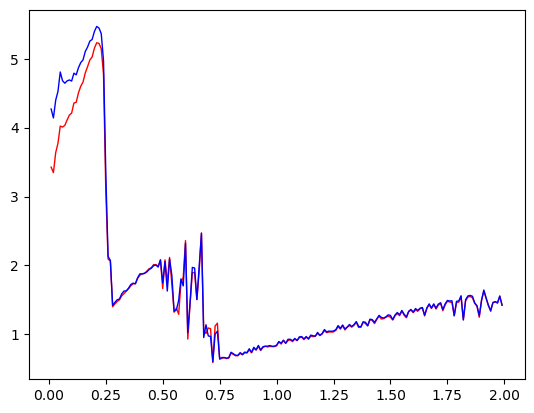

In [104]:
plt.plot(np.arange(0.01,2,0.01), poly_lasso_reg_training_loss, "r-", linewidth=1, label="train")
plt.plot(np.arange(0.01,2,0.01), poly_lasso_reg_validation_loss, "b-", linewidth=1, label="valid")

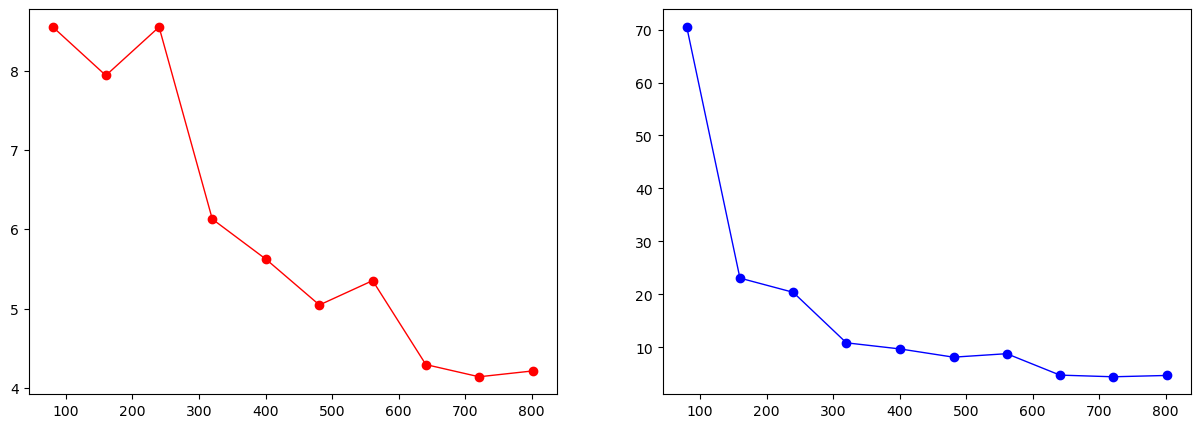

In [105]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

## Task 6 e: Train  a  Elastic Net Regression  model  using  the  training  data  with  four-fold  cross-validation using appropriate evaluation metric. Display the training and validation loss as a function of training iterations. 

In [106]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

elastic_net.fit(poly_phi_train, t_train)

t_pred = elastic_net.predict(poly_phi_test)

elastic_net_cv = cross_validate(elastic_net, 
                        poly_phi_train, 
                        t_train, 
                        scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'], 
                        cv=4, 
                        return_train_score=True)

In [107]:
# let's look at the output from k fold
print("Elastic Net Regression: ")
print("\n For metric R^2 :")
print("\t Training loss: {:,.3f}".format(np.mean(elastic_net_cv['train_r2'])))
print("\t Validation loss: {:,.3f}".format(np.mean(elastic_net_cv['test_r2'])))


print("\n For metric Root mean Squared Error(RMSE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(elastic_net_cv['train_neg_root_mean_squared_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(elastic_net_cv['test_neg_root_mean_squared_error'])))


print("\n For metric Mean Absolute Error(MAE) :")
print("\t Training loss: {:,.3f}".format(-np.mean(ridge_reg_cv['train_neg_mean_absolute_error'])))
print("\t Validation loss: {:,.3f}".format(-np.mean(ridge_reg_cv['test_neg_mean_absolute_error'])))

Elastic Net Regression: 

 For metric R^2 :
	 Training loss: 0.991
	 Validation loss: 0.990

 For metric Root mean Squared Error(RMSE) :
	 Training loss: 1,141.442
	 Validation loss: 1,210.273

 For metric Mean Absolute Error(MAE) :
	 Training loss: 4.273
	 Validation loss: 4.594


#### Training and validation loss as a function of training set size

In [108]:
train_sizes, train_scores, valid_scores = learning_curve(elastic_net, 
                                                         poly_phi_train, 
                                                         t_train, 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), 
                                                         cv=4, 
                                                         scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

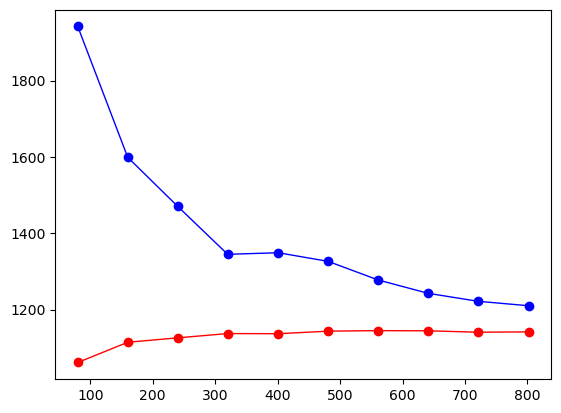

In [109]:
plt.plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
plt.plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

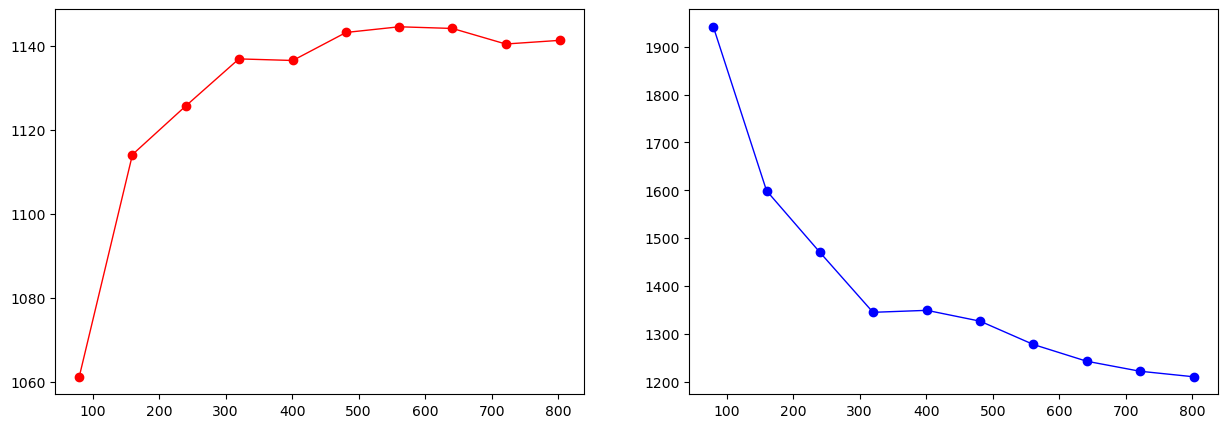

In [110]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
axes[1].plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")

# ElasticNet with different penalty terms : 

The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. 

For l1_ratio = 0 the penalty is an L2 penalty. 

For l1_ratio = 1 it is an L1 penalty. 

For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

### Hyperparameter Tuning for ElasticNet Regression

In [111]:
elastic_net_cv = ElasticNetCV(alphas= [0.01], l1_ratio=np.arange(0.0,1.1,0.1)).fit(poly_phi_train, t_train)
elastic_net_cv.score(poly_phi_train, t_train)

0.9999999347773918

In [112]:
elastic_net_cv.alpha_ , elastic_net_cv.l1_ratio_

(0.01, 1.0)

In [113]:
poly_elastic_net_training_loss = []
poly_elastic_net_validation_loss = []
for l1_ratio_value in np.arange(0.0,1.1,0.1):
    poly_elastic_net = ElasticNet(alpha=0.01, l1_ratio=l1_ratio_value)
    poly_elastic_net_cv = cross_validate(poly_elastic_net, 
                                  poly_phi_train, 
                                  t_train, 
                                  scoring='neg_root_mean_squared_error', 
                                  cv=4, 
                                  return_train_score=True)

    poly_elastic_net_training_loss.append(-np.mean(poly_elastic_net_cv['train_score']))
    poly_elastic_net_validation_loss.append(-np.mean(poly_elastic_net_cv['test_score']))

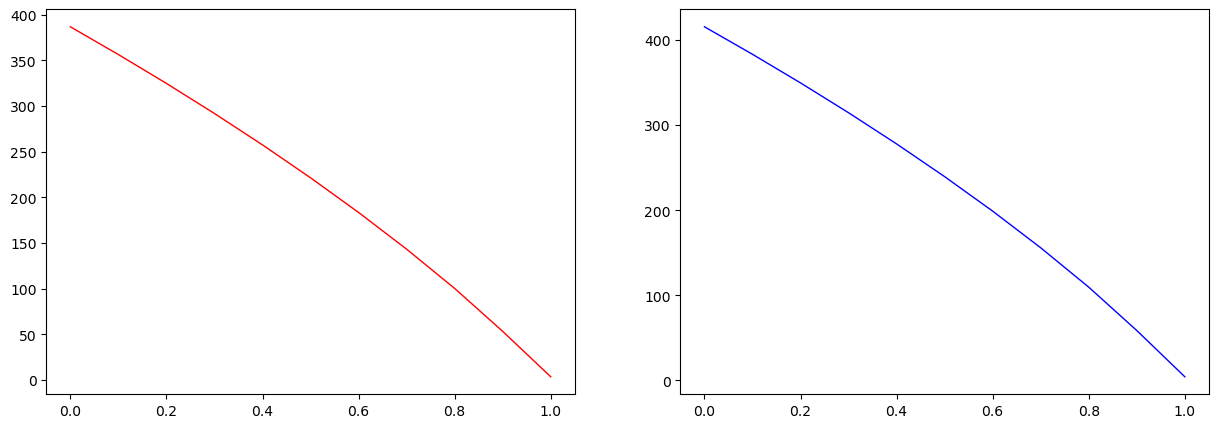

In [114]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(np.arange(0.0,1.1,0.1), poly_elastic_net_training_loss, "r-", linewidth=1, label="train")
axes[1].plot(np.arange(0.0,1.1,0.1), poly_elastic_net_validation_loss, "b-", linewidth=1, label="valid")
plt.show()

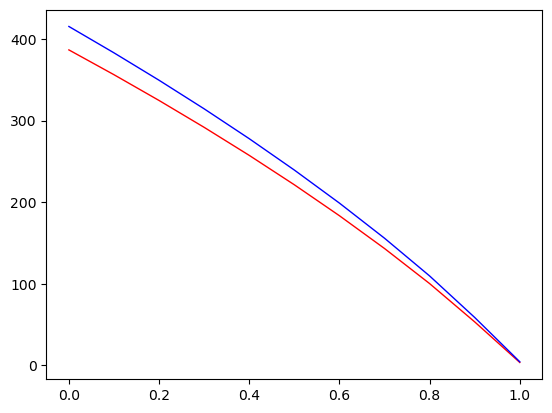

In [115]:
plt.plot(np.arange(0.0,1.1,0.1), poly_elastic_net_training_loss, "r-", linewidth=1, label="train")
plt.plot(np.arange(0.0,1.1,0.1), poly_elastic_net_validation_loss, "b-", linewidth=1, label="valid")

### Task 6: Observations: 
As we can observe, there is very little diffrence between training loss and testing loss of all the polynomial regression models, when a cross validation method used with 3 parameters  𝑅2, Root-Mean Squared Error, and Mean Absolute error. This suggests that the Linear regression model is overfitting but with a very little margin.

## T7 Make  predictions  of  the  labels  on  the  test  data,  using  the  trained  model  with  chosen hyperparameters. 

### Model 1: Simple Linear Regression

In [116]:
reg = LinearRegression().fit(phi_train, t_train)
t_pred = reg.predict(phi_test)

In [117]:
# let's look at the output from k fold
print("Linear Regression: ")
print("\n R^2: {:,.3f}".format(r2_score(t_test, t_pred)))
print("\n Root mean Squared Error(RMSE) : {:,.3f}".format(np.sqrt(mean_squared_error(t_test, t_pred))))
print("\n Mean Absolute Error(MAE): {:,.3f}".format(mean_absolute_error(t_test, t_pred)))

Linear Regression: 

 R^2: 1.000

 Root mean Squared Error(RMSE) : 0.000

 Mean Absolute Error(MAE): 0.000


### Model 2 : Linear Regression with Stochastic Gradient Descent 

In [118]:
sgd_reg = SGDRegressor(max_iter=1000, 
                       tol=1e-5, 
                       eta0=0.01, 
                       n_iter_no_change=100, 
                       random_state=42)

sgd_reg.fit(phi_train, t_train)

t_pred = sgd_reg.predict(phi_test)

In [119]:
# let's look at the output from k fold
print("Linear Regression with Stochastic Gradient Descent: ")
print("\n R^2: {:,.3f}".format(r2_score(t_test, t_pred)))
print("\n Root mean Squared Error(RMSE) : {:,.3f}".format(np.sqrt(mean_squared_error(t_test, t_pred))))
print("\n Mean Absolute Error(MAE): {:,.3f}".format(mean_absolute_error(t_test, t_pred)))

Linear Regression with Stochastic Gradient Descent: 

 R^2: 1.000

 Root mean Squared Error(RMSE) : 2.271

 Mean Absolute Error(MAE): 1.639


### Model 3: Linear Regression with Ridge Regularization

In [120]:
ridge_reg = Ridge(alpha=0.13, solver="cholesky")

ridge_reg.fit(phi_train, t_train)

t_pred = ridge_reg.predict(phi_test)

In [121]:
# let's look at the output from k fold
print("Linear Regression with Ridge Regularization: ")
print("\n R^2: {:,.3f}".format(r2_score(t_test, t_pred)))
print("\n Root mean Squared Error(RMSE) : {:,.3f}".format(np.sqrt(mean_squared_error(t_test, t_pred))))
print("\n Mean Absolute Error(MAE): {:,.3f}".format(mean_absolute_error(t_test, t_pred)))

Linear Regression with Ridge Regularization: 

 R^2: 1.000

 Root mean Squared Error(RMSE) : 2.763

 Mean Absolute Error(MAE): 1.995


### Model 4 : Linear Regression with Lasso Regularization 

In [122]:
lasso_reg = Lasso(alpha=0.01)

lasso_reg.fit(phi_train, t_train)

t_pred = lasso_reg.predict(phi_test)

In [123]:
# let's look at the output from k fold
print("Linear Regression with Lasso Regularization: ")
print("\n R^2: {:,.3f}".format(r2_score(t_test, t_pred)))
print("\n Root mean Squared Error(RMSE) : {:,.3f}".format(np.sqrt(mean_squared_error(t_test, t_pred))))
print("\n Mean Absolute Error(MAE): {:,.3f}".format(mean_absolute_error(t_test, t_pred)))

Linear Regression with Lasso Regularization: 

 R^2: 1.000

 Root mean Squared Error(RMSE) : 0.768

 Mean Absolute Error(MAE): 0.584


### Model 5: Linear Regression with Elastic Net Regularization 

In [124]:
elastic_net = ElasticNet(alpha=0.01, l1_ratio=1.0)

elastic_net.fit(phi_train, t_train)

t_pred = elastic_net.predict(phi_test)

In [125]:
# let's look at the output from k fold
print("Linear Regression with Elastic Net Regularization: ")
print("\n R^2: {:,.3f}".format(r2_score(t_test, t_pred)))
print("\n Root mean Squared Error(RMSE) : {:,.3f}".format(np.sqrt(mean_squared_error(t_test, t_pred))))
print("\n Mean Absolute Error(MAE): {:,.3f}".format(mean_absolute_error(t_test, t_pred)))

Linear Regression with Elastic Net Regularization: 

 R^2: 1.000

 Root mean Squared Error(RMSE) : 0.768

 Mean Absolute Error(MAE): 0.584


### Model 6: Simple Polynomial Regression

In [126]:
reg = LinearRegression().fit(poly_phi_train, t_train)

t_pred = reg.predict(poly_phi_test)

In [127]:
# let's look at the output from k fold
print("Simple Polynomial Regression: ")
print("\n R^2: {:,.3f}".format(r2_score(t_test, t_pred)))
print("\n Root mean Squared Error(RMSE) : {:,.3f}".format(np.sqrt(mean_squared_error(t_test, t_pred))))
print("\n Mean Absolute Error(MAE): {:,.3f}".format(mean_absolute_error(t_test, t_pred)))

Simple Polynomial Regression: 

 R^2: 1.000

 Root mean Squared Error(RMSE) : 0.000

 Mean Absolute Error(MAE): 0.000


### Model 7 : Polynomial Regression with Stochastic Gradient Descent 

In [128]:
sgd_reg = SGDRegressor(max_iter=1000, 
                       tol=1e-5, 
                       eta0=0.01, 
                       n_iter_no_change=100, 
                       random_state=42)

sgd_reg.fit(poly_phi_train, t_train)

t_pred = sgd_reg.predict(poly_phi_test)

In [129]:
# let's look at the output from k fold
print("Polynomial Regression with Stochastic Gradient Descent: ")
print("\n R^2: {:,.3f}".format(r2_score(t_test, t_pred)))
print("\n Root mean Squared Error(RMSE) : {:,.3f}".format(np.sqrt(mean_squared_error(t_test, t_pred))))
print("\n Mean Absolute Error(MAE): {:,.3f}".format(mean_absolute_error(t_test, t_pred)))

Polynomial Regression with Stochastic Gradient Descent: 

 R^2: 1.000

 Root mean Squared Error(RMSE) : 43.988

 Mean Absolute Error(MAE): 23.350


### Model 8: Polynomial Regression with Ridge Regularization

In [130]:
ridge_reg = Ridge(alpha=0.02, solver="cholesky")

ridge_reg.fit(poly_phi_train, t_train)

t_pred = ridge_reg.predict(poly_phi_test)

In [131]:
# let's look at the output from k fold
print("Polynomial Regression with Ridge Regularization: ")
print("\n R^2: {:,.3f}".format(r2_score(t_test, t_pred)))
print("\n Root mean Squared Error(RMSE) : {:,.3f}".format(np.sqrt(mean_squared_error(t_test, t_pred))))
print("\n Mean Absolute Error(MAE): {:,.3f}".format(mean_absolute_error(t_test, t_pred)))

Polynomial Regression with Ridge Regularization: 

 R^2: 1.000

 Root mean Squared Error(RMSE) : 1.079

 Mean Absolute Error(MAE): 0.657


### Model 9 : Polynomial Regression with Lasso Regularization 

In [132]:
lasso_reg = Lasso(alpha=0.01)

lasso_reg.fit(poly_phi_train, t_train)

t_pred = lasso_reg.predict(poly_phi_test)

In [133]:
# let's look at the output from k fold
print("Polynomial Regression with Lasso Regularization: ")
print("\n R^2: {:,.3f}".format(r2_score(t_test, t_pred)))
print("\n Root mean Squared Error(RMSE) : {:,.3f}".format(np.sqrt(mean_squared_error(t_test, t_pred))))
print("\n Mean Absolute Error(MAE): {:,.3f}".format(mean_absolute_error(t_test, t_pred)))

Polynomial Regression with Lasso Regularization: 

 R^2: 1.000

 Root mean Squared Error(RMSE) : 3.074

 Mean Absolute Error(MAE): 1.887


### Model 10: Polynomial Regression with Elastic Net Regularization 

In [134]:
elastic_net = ElasticNet(alpha=0.01, l1_ratio=1.0)

elastic_net.fit(poly_phi_train, t_train)

t_pred = elastic_net.predict(poly_phi_test)

In [135]:
# let's look at the output from k fold
print("Polynomial Regression with Elastic Net Regularization: ")
print("\n R^2: {:,.3f}".format(r2_score(t_test, t_pred)))
print("\n Root mean Squared Error(RMSE) : {:,.3f}".format(np.sqrt(mean_squared_error(t_test, t_pred))))
print("\n Mean Absolute Error(MAE): {:,.3f}".format(mean_absolute_error(t_test, t_pred)))

Polynomial Regression with Elastic Net Regularization: 

 R^2: 1.000

 Root mean Squared Error(RMSE) : 3.074

 Mean Absolute Error(MAE): 1.887


### Discuss the results. Include thoughts about what further can be explored to increase performance.
### Conclusion:
    1. All the models has value of ${R^2}$ equal to 1 hence our dataset is linearly predictable
    2. Out of all 10 modes, the linear Regression has the least RMSE and MAE (perfect 0). Thus, for this perticular dataset we will use Linear Regression as it predicts our dataset best.
### Improvements : 
    1. We have tried only the polynomial degree 2, we can increase the polynomial degree and can explore the models more.
    2. Also, for the learning rate, we selected range from (0.01, 2) with 0.01 step increase. This range can be further increased, say(0.00001, 100) with 0.001 step increase.

#### Refrences:
1. Dataset taken from kaggle